In [37]:
#発展ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import os
import seaborn as sns
from sklearn.metrics import accuracy_score as AC
from sklearn.model_selection import train_test_split

#モデルライブラリのインポート&準備
from sklearn.svm import SVC
model_SVC = SVC()
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 3,weights = "uniform",algorithm = 'brute')
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(max_depth = 7,max_features = 8,bootstrap = 1)
from sklearn.ensemble import VotingClassifier as VC
entimators_hard = [('SVC',model_SVC),('KNN',model_KNN),('RFC',model_RFC)]
model_VTC = VC(entimators_hard,voting='hard')

#google driveと紐付け
from google.colab import drive
drive.mount('/content/drive')

#パス保存
data_path = os.getcwd()+'/drive/MyDrive/e-sport-winner/data/'
folder_path = os.getcwd() + ('/drive/MyDrive/e-sport-winner/')

#データフレームの作成
df_train = pd.read_csv(data_path + 'train.csv', index_col=0)
df_test = pd.read_csv(data_path + 'test.csv', index_col=0)
names = ["gameId","blueWins"]
df_sample = pd.read_csv('/content/drive/MyDrive/e-sport-winner/sample_submit.csv', names = names)

#データ前処理
#トレーニングデータ
training_data = df_train.drop(["blueWins"],axis=1)
#テストデータ
sample_test = df_train["blueWins"]
sample_test = pd.DataFrame(sample_test)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


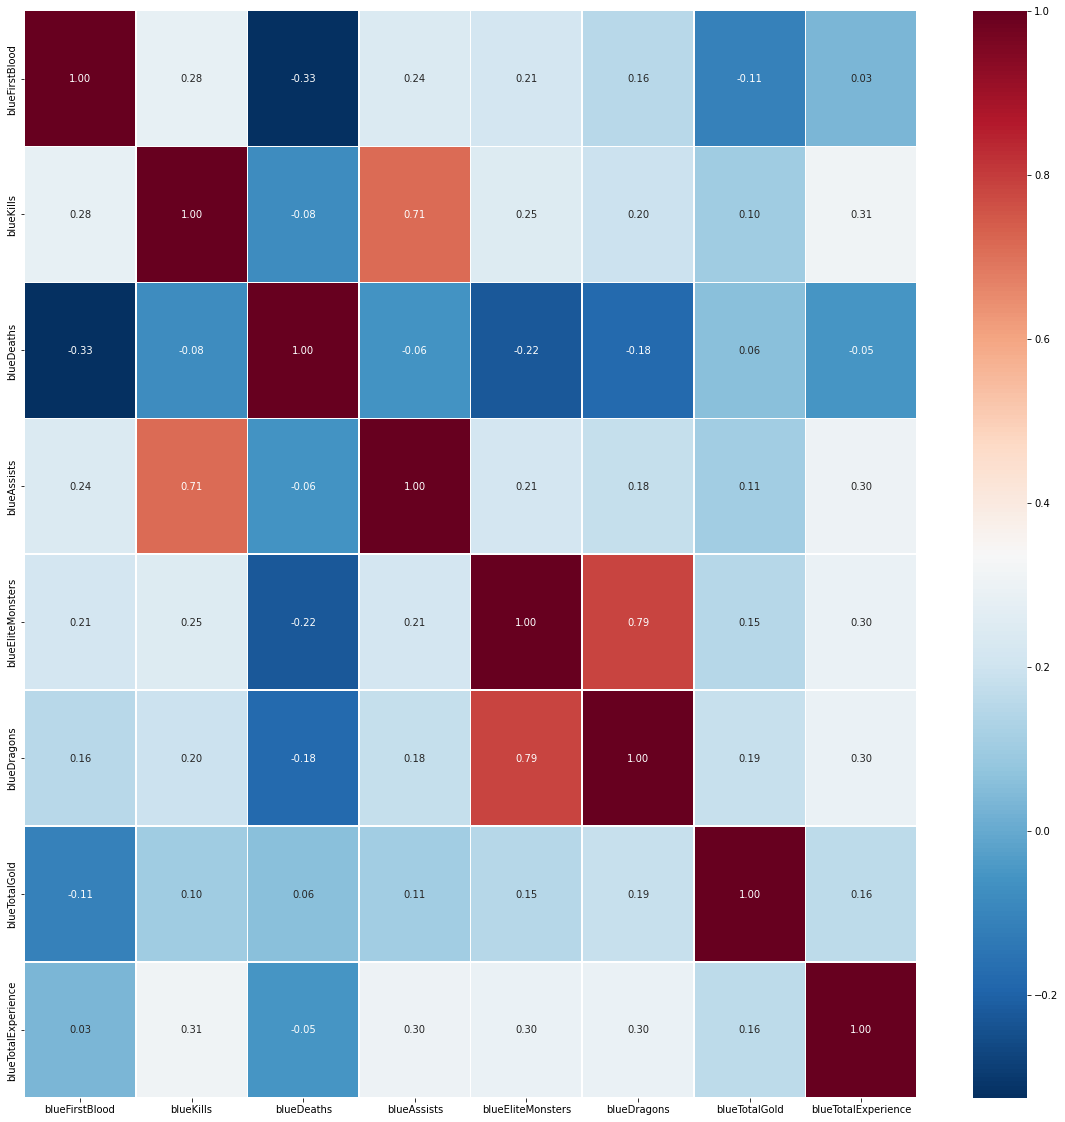

In [3]:
#データ重要度表
plt.figure(figsize=(20,20))
sns.heatmap(
    training_data.corr(),
    annot=True,
    fmt='.2f',
    cmap="RdBu_r",
    linecolor="white",
    linewidth=0.5
)

In [38]:
#検証データ学習とテスト
for model in (model_SVC,model_KNN,model_RFC,model_VTC):
    print(model.__class__.__name__)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

SVC


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:0.75125

KNeighborsClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_score:0.75875

RandomForestClassifier


<ipython-input-38-48803e410c7f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


accuracy_score:0.7916666666666666

VotingClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_score:0.78875



In [39]:
#本番テスト
MyAnswer = model_RFC.predict(df_test)

In [40]:
#シリーズ型変換
MyAnswer = pd.Series(MyAnswer)

In [41]:
#ファイル保存
df_sample["blueWins"]=MyAnswer
df_sample.to_csv(folder_path + 'MyAnswer/MyAnswer8_game.csv',index=False,header=False)